# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [12]:
# Dependencies and Setup
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
from api_keys import g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [13]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [14]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

631


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:
# Base URL to work off                         
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Counter to go through data
record = 0
sets = 1

# Create DataFrame
weather_df = pd.DataFrame({"City": cities})

weather_df["Country"] = ""
weather_df["Date"] = ""      
weather_df["Latitude"] = ""
weather_df["Longitude"] = ""
weather_df["Cloudiness (%)"] = ""
weather_df["Humidity (%)"] = ""
weather_df["Max Temp (F)"] = ""
weather_df["Wind Speed (mph)"] = ""


# Interate through Cities and retrieve data
print("Beginning Data Retrieval")
print("-----------------------------")


for index, row in weather_df.iterrows():
    
    city = row["City"]
    
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city
    weather_response = requests.get(query_url).json()
 
    try:
        print(f"Processing Record {record}  of Set {sets} | {city}.")
        #print (query_url) 
        
        weather_df.loc[index, "Country"] = weather_response["sys"]["country"]     
        weather_df.loc[index, "Date"] = datetime.datetime.fromtimestamp(weather_response["dt"])
        weather_df.loc[index, "Latitude"] = weather_response["coord"]["lat"]
        weather_df.loc[index, "Longitude"] = weather_response["coord"]["lon"]
        weather_df.loc[index, "Cloudiness (%)"] = weather_response["clouds"]["all"]
        weather_df.loc[index, "Humidity (%)"] = weather_response["main"]["humidity"]
        weather_df.loc[index, "Max Temp (F)"] = 1.8 * (weather_response["main"]["temp_max"] - 273) + 32
        weather_df.loc[index, "Wind Speed (mph)"] = weather_response["wind"]["speed"]
               
    except:
        print(f"City not found...skipping {city}.")
        #print (query_url) 
        
    
    record = record + 1
    if record == 50:
        record = 0
        sets = sets + 1 

print("-----------------------------")        
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0  of Set 1 | rikitea.
Processing Record 1  of Set 1 | albany.
Processing Record 2  of Set 1 | brejning.
Processing Record 3  of Set 1 | ushuaia.
Processing Record 4  of Set 1 | cape town.
Processing Record 5  of Set 1 | takoradi.
Processing Record 6  of Set 1 | kavieng.
Processing Record 7  of Set 1 | iqaluit.
Processing Record 8  of Set 1 | san carlos de bariloche.
Processing Record 9  of Set 1 | lagos.
Processing Record 10  of Set 1 | sola.
Processing Record 11  of Set 1 | mataura.
Processing Record 12  of Set 1 | busselton.
Processing Record 13  of Set 1 | tautira.
Processing Record 14  of Set 1 | dolores.
Processing Record 15  of Set 1 | hilo.
Processing Record 16  of Set 1 | ribeira grande.
Processing Record 17  of Set 1 | port alfred.
Processing Record 18  of Set 1 | bambous virieux.
Processing Record 19  of Set 1 | chuy.
Processing Record 20  of Set 1 | hobart.
Processing Record 21  of Set 1 | zyryanka.
Pr

Processing Record 25  of Set 4 | lasa.
Processing Record 26  of Set 4 | sisimiut.
Processing Record 27  of Set 4 | chokurdakh.
Processing Record 28  of Set 4 | arraial do cabo.
Processing Record 29  of Set 4 | bengkulu.
Processing Record 30  of Set 4 | port-gentil.
Processing Record 31  of Set 4 | victoria.
Processing Record 32  of Set 4 | inta.
Processing Record 33  of Set 4 | uyskoye.
Processing Record 34  of Set 4 | mastic beach.
Processing Record 35  of Set 4 | bethel.
Processing Record 36  of Set 4 | tuktoyaktuk.
Processing Record 37  of Set 4 | paita.
Processing Record 38  of Set 4 | mayumba.
Processing Record 39  of Set 4 | tukums.
Processing Record 40  of Set 4 | salazie.
Processing Record 41  of Set 4 | vao.
Processing Record 42  of Set 4 | avenal.
Processing Record 43  of Set 4 | poum.
Processing Record 44  of Set 4 | pochutla.
Processing Record 45  of Set 4 | xadani.
City not found...skipping xadani.
Processing Record 46  of Set 4 | hamilton.
Processing Record 47  of Set 4 |

Processing Record 0  of Set 8 | saint-francois.
Processing Record 1  of Set 8 | ialibu.
Processing Record 2  of Set 8 | menongue.
Processing Record 3  of Set 8 | port hardy.
Processing Record 4  of Set 8 | tulum.
Processing Record 5  of Set 8 | smithers.
Processing Record 6  of Set 8 | koutsouras.
Processing Record 7  of Set 8 | chitral.
Processing Record 8  of Set 8 | along.
Processing Record 9  of Set 8 | ketchikan.
Processing Record 10  of Set 8 | winnemucca.
Processing Record 11  of Set 8 | polson.
Processing Record 12  of Set 8 | photharam.
Processing Record 13  of Set 8 | doctor pedro p. pena.
City not found...skipping doctor pedro p. pena.
Processing Record 14  of Set 8 | miranda de ebro.
Processing Record 15  of Set 8 | mucuri.
Processing Record 16  of Set 8 | alta floresta.
Processing Record 17  of Set 8 | loubomo.
Processing Record 18  of Set 8 | tatabanya.
Processing Record 19  of Set 8 | malakal.
Processing Record 20  of Set 8 | bismarck.
Processing Record 21  of Set 8 | gr

Processing Record 29  of Set 11 | barcelona.
Processing Record 30  of Set 11 | koslan.
Processing Record 31  of Set 11 | shelburne.
Processing Record 32  of Set 11 | chor.
Processing Record 33  of Set 11 | black river.
Processing Record 34  of Set 11 | beringovskiy.
Processing Record 35  of Set 11 | conde.
Processing Record 36  of Set 11 | ixtapa.
Processing Record 37  of Set 11 | bani walid.
Processing Record 38  of Set 11 | lusambo.
Processing Record 39  of Set 11 | kastamonu.
Processing Record 40  of Set 11 | brae.
Processing Record 41  of Set 11 | harnosand.
Processing Record 42  of Set 11 | hobyo.
Processing Record 43  of Set 11 | kupang.
Processing Record 44  of Set 11 | san lorenzo.
Processing Record 45  of Set 11 | maymyo.
Processing Record 46  of Set 11 | matay.
Processing Record 47  of Set 11 | atar.
Processing Record 48  of Set 11 | mount pleasant.
Processing Record 49  of Set 11 | aktau.
Processing Record 0  of Set 12 | talcahuano.
Processing Record 1  of Set 12 | lawton.
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
# Display DataFrame
weather_df.head()

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,rikitea,PF,2022-05-04 19:40:53,-23.1203,-134.9692,74,83,77.63,8.77
1,albany,US,2022-05-04 19:40:54,42.6001,-73.9662,100,92,53.654,1.63
2,brejning,DK,2022-05-04 19:40:54,55.6613,9.677,100,69,55.688,4.51
3,ushuaia,AR,2022-05-04 19:40:54,-54.8,-68.3,40,65,44.492,6.17
4,cape town,ZA,2022-05-04 19:40:55,-33.9258,18.4232,0,87,64.382,4.12


In [17]:
# Convert data strings to float
pd.to_numeric(weather_df["Cloudiness (%)"]).astype(float)
pd.to_numeric(weather_df["Humidity (%)"]).astype(float)
pd.to_numeric(weather_df["Latitude"]).astype(float)
pd.to_numeric(weather_df["Longitude"]).astype(float)
pd.to_numeric(weather_df["Max Temp (F)"]).astype(float)
pd.to_numeric(weather_df["Wind Speed (mph)"]).astype(float)
weather_df

#Export DataFrame to CSV File
weather_df.to_csv("weather_df.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [28]:
high_humidity_df = city_data_df[(city_data_df['Humidity'] > 100)]
high_humidity_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date


In [29]:
#  Get the indices of cities that have humidity over 100%.
high_humidity_df.index

Int64Index([], dtype='int64')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

The plot proves that as we generally move away from the equator, temperature drops


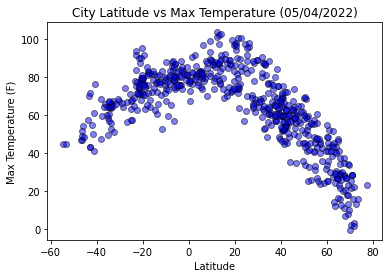

In [31]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Max Temp (F)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature ({today})")
print("The plot proves that as we generally move away from the equator, temperature drops")

## Latitude vs. Humidity Plot

The plot shows that there is no real pattern that can describe the relationship between latitude and humidity


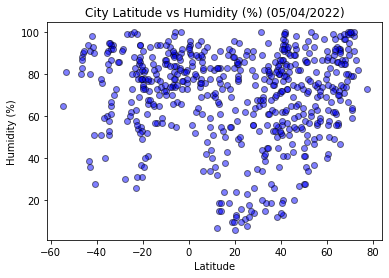

In [32]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Humidity (%)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity (%) ({today})")
print("The plot shows that there is no real pattern that can describe the relationship between latitude and humidity")

## Latitude vs. Cloudiness Plot

The plot shows that there is no real pattern that can describe the relationship between latitude and cloudiness


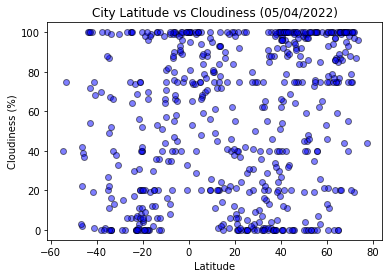

In [33]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Cloudiness (%)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({today})")
print("The plot shows that there is no real pattern that can describe the relationship between latitude and cloudiness")

## Latitude vs. Wind Speed Plot

The plot shows that there is no real pattern that can describe the relationship between latitude and windspeed


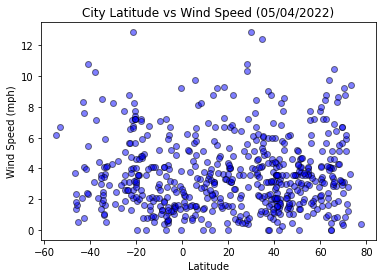

In [34]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Wind Speed (mph)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed ({today})")
print("The plot shows that there is no real pattern that can describe the relationship between latitude and windspeed")

## Linear Regression

In [35]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) > 0, :]
southern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -0.98x + 98.04
The r-squared is: -0.8673418580793243
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


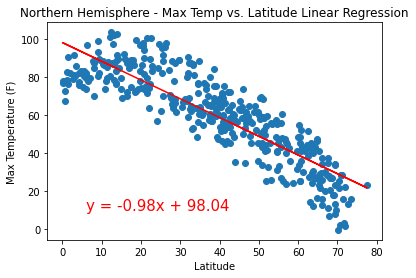

In [36]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.64x + 84.64
The r-squared is: 0.7140469632331733
The regression displays a positive correlation.
In the southern hemisphere, as you get closer to the equator the temperature increases.


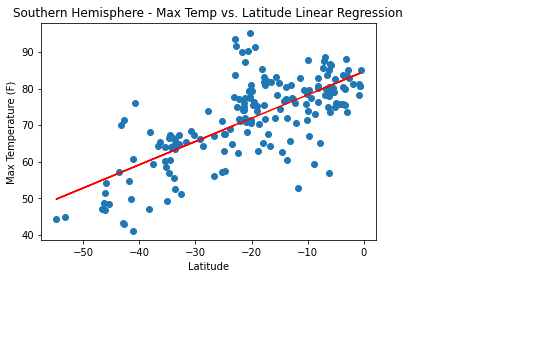

In [37]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the southern hemisphere, as you get closer to the equator the temperature increases.")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.22x + 59.31
The r-squared is: 0.18645885619420857
The regression does not display much of a correlation between the data sets.


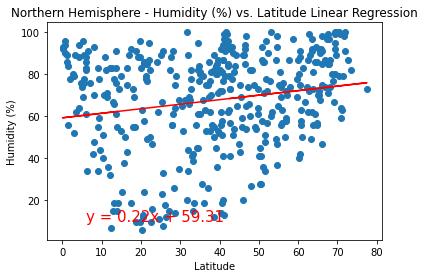

In [38]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.") 
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.13x + 77.93
The r-squared is: 0.10370412186768864
The regression does not display much of a correlation between the data sets.


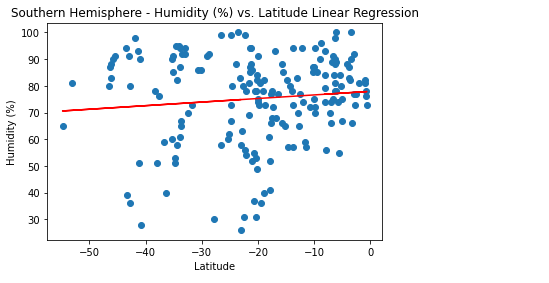

In [39]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.3x + 48.36
The r-squared is: 0.16132255039116816
The regression does not display much of a correlation between the data sets.


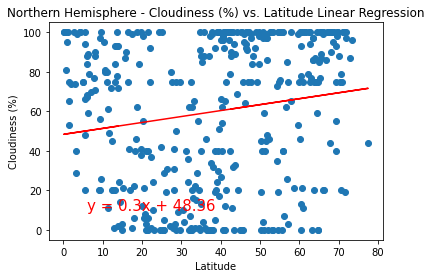

In [40]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.67x + 61.49
The r-squared is: 0.23170969322700702
The regression does not display much of a correlation between the data sets.


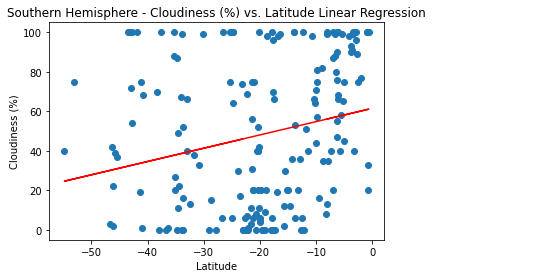

In [41]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.01x + 3.33
The r-squared is: 0.06340898528133271
The regression does not display much of a correlation between the data sets.


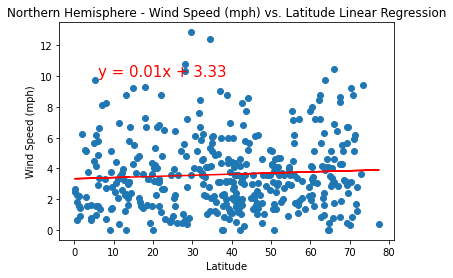

In [42]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.04x + 2.84
The r-squared is: -0.18653017030560767
The regression does not display much of a correlation between the data sets.


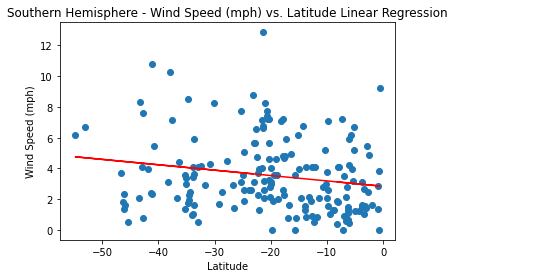

In [43]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()